<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
## Análise de Ativos da Bolsa Brasileira de Empresas entre 2020-2024

In [ ]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'Johannes Mattheus Krouwel, 20.01248-9' #@param {type:"string"}
Aluno2 = 'Kaique de Andrade Almeida, 17.01113-2' #@param {type:"string"}
Aluno3 = 'Filipe dos Santos Pugliesi, 18.02608-7' #@param {type:"string"}
Aluno4 = 'Marcel Marques Caceres, 17.00648-0' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}





# **Resumo (*Abstract*)**

Através dos dados nos fornecidos sobre os casos de Covid entre 2020 e 2024, examinamos a evolução dos casos, casos e óbitos novos e casos em acompanhamento durante o período. Relacionando isso com a evolução dos ativos das empresas LOG-IN Logística Modal e as Linhas Aéreas Gol durante o mesmo tempo, analisamos quais causas e correlações poderiam existir entre os dois eventos. Como uma observação bônus, também analisamos os mesmos com a quantidade de pacientes com Síndrome Respiratória Aguda Grave vacinados contra Covid-19 entre 2021 e 2023.

# **Introdução**

(Infelizmente foi pego o template errado para fazer o projeto. A culpa foi completamente minha, peço desculpas por isso. Devido as provas e o tempo dado ao projeto, tenho quase certeza que não há chance para um oportunidade de refazê-lo.
-Johannes Mattheus Krouwel)

O propósito dessa análise é observar como os ativos da bolsa brasileira da LOG-IN Logística Modal e as Linhas Aéreas Gol foram afetadas pela pandemia COVID e o período posterior. Espera-se que maior parte das empresas do mundo, especialmente uma de transporte como a Gol, teriam sofrido economicamente durante a pandemia, porém também é necessário saber o quanto conseguiram se recuperar.

Além disso, também foram analisados os dados de Síndrome Respiratória Aguda Grave entre 2021 e 2023 disponíveis em https://opendatasus.saude.gov.br/ para ver se houve alguma correlação entre os dados anteriores durante da segunda metade da pandemia e o ano depois de tal terminar. Infelizmente dados de 2020 e 2024 não estavam disponíveis.

# **Descrição e origem dos dados**

As fontes dos dados são principalmente recursos do governo disponíveis publicamente, incluindo casos de Covid, quantas infecções e óbitos foram registradas diariamente, os sintomas específicos de cada paciente, etc. As que não fazem parte de tal categoria são dados de ativos de bolsa B3, especificamente dos da empresa Vias Aéreas Gol e LOG-IN Logística Modal, também disponíveis publicamente.

# **Aquisição e Preparação dos dados**










In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import zipfile

# Dados de excel convertidos para dataframes
# Dados sobre Covid entre 2020 e 2024

zip_path = '/Desktop/CDadosProj1/HIST_PAINEL_COVIDBR_06abr2024.zip'

df_total = pd.DataFrame()

# Abrir o arquivo ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    print(z.namelist())

with zipfile.ZipFile(zip_path, 'r') as z:
    for filename in z.namelist():
        if filename.endswith('.csv'):
            try:
                with z.open(filename) as f:
                    df = pd.read_csv(f, sep=';', on_bad_lines='skip')
                    # print(df.head())
                    df_total = pd.concat([df_total,df], ignore_index=True)
            except Exception as e:
                print(f"Erro ao ler {filename}: {e}")

In [ ]:
# Fazendo download de yfinance caso o computador do professor não tenha
pip install yfinance --upgrade --no-cache-dir

In [ ]:
# Fazendo download de scikit-learn caso o computador do professor não tenha
pip install scikit-learn

In [ ]:
# Pegando dados da Gol e LOG-IN
import yfinance as yf

tickers = ['GOLL4.SA', 'LOGN3.SA']
data = yf.download(tickers, start='2020-02-25', end='2024-04-06')

In [ ]:
# Obtendo dados de Síndrome Respiratória Aguda Grave

zip_path = '/Desktop/CDadosProj1/INFLUD_Covid.zip'

df_influd = pd.DataFrame()

with zipfile.ZipFile(zip_path, 'r') as z:
    print(z.namelist())

with zipfile.ZipFile(zip_path, 'r') as z:
    for filename in z.namelist():
        if filename.endswith('.csv'):
            try:
                with z.open(filename) as f:
                    df = pd.read_csv(f, sep=';', on_bad_lines='skip')
                    df_influd = pd.concat([df_influd,df], ignore_index=True)
            except Exception as e:
                print(f"Erro ao ler {filename}: {e}")

In [ ]:
# Mudando as datas para o formato datetime para que possam ser utilizadas

import matplotlib.dates as mdates
import datetime as dt

df_total['data'] = pd.to_datetime(df_total['data'])

df_influd['DT_SIN_PRI'] = pd.to_datetime(df_influd['DT_SIN_PRI'],dayfirst=True)

In [ ]:
# Colocando dados de data e vacinação em um novo dataframe para que possam ser utilizados sem erro de RAM
counts = df_influd[df_influd.VACINA_COV == 1].groupby('DT_SIN_PRI').VACINA_COV.value_counts().reset_index().rename(columns={"index": "data", 0: "count"})

df_hist = pd.DataFrame()
df_hist['Data'] = pd.date_range(start='1/3/2021', end='12/31/2023')
#'2021-01-01':'2023-12-31'
df_hist['Num_Vacinados'] = counts['count']
df_hist.head()

# **Análises**

Busque orientar sua análise a perguntas que sejam feitas aos dados. Empregue de 5 a 6 perguntas relevantes, que podem estar relacionadas 1-2 temas dentro do problema escolhido. Empregue seleções, gráficos e outros recursos que julgar necessário para **comunicar** suas análises. Empregue instrumentos que dão suporte à sua análise, como correlações, gráficos, pareto, teste de hipóteses etc.

Abaixo um modelo opcional para as perguntas.

## **Q1. Pergunta 1.** Hé alguma correlação direta entre a evolução dos casos de Covid-19 no Brasil e os ativos da Bolsa de GOLL4 e LOGN3?

Não parece existir uma correlação completamente direta entre ambos bancos de dados, porém existem relações menores que podem ser explicadas.

## **Q2. Pergunta 2.** A quantidade de casos novos de Covid-19 no Brasil afetou em algum ponto os ativos da Bolsa de GOLL4 e LOGN3?

O surto de casos no início de 2022 parece ter despencado levemente o valor dos ativos de ambos durante tal época, diminuindo a valor de ambos temporariamente por aproximadamente 4 reais.

## **Q3. Pergunta 3.** A quantidade de óbitos novos de Covid-19 no Brasil afetou em algum ponto os ativos da Bolsa de GOLL4 e LOGN3?

O despenco do valor dos ativos no primeiro trismestre de 2021 parecer ter sido causado pelo pico de óbitos no mesmo período. As 4025 mortes afetaram ambas empresas nesse ponto mais do que qualquer outro.

In [ ]:
# Análise exploratória dos dados da Covid-19
# Número de casos ao longo do tempo
plt.figure(figsize=(10, 6))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['casosAcumulado'], label='Casos Acumulados', color = 'red')
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['obitosAcumulado'], label='Obitos Acumulados', color = 'black')
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['Recuperadosnovos'], label='Recuperados Acumulados', color = 'blue')
#plt.gcf().autofmt_xdate()
plt.xlabel('Data')
plt.ylabel('Dados')
plt.title('Evolução dos Casos de Covid-19 no Brasil')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Casos Novos pelo Brasil x Data
plt.figure(figsize=(10, 6))
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['casosNovos'], label='Casos Novos')
plt.xlabel('Data')
plt.ylabel('Casos Novos')
plt.title('Casos Novos de Covid-19 no Brasil')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Obitos Novos pelo Brasil x Data
plt.figure(figsize=(10, 6))
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['obitosNovos'], label='Obitos Novos')
plt.xlabel('Data')
plt.ylabel('Obitos Novos')
plt.title('Obitos Novos de Covid-19 no Brasil')
plt.legend()
plt.grid(True)
plt.show()

## **Q4. Pergunta 4.** Houve algum erro de análise nos dados que você pesquisou?

Por alguma razão, provavelmente um erro no registramento de dados, houve um pico inexistente de casos em acompanhamento de Covid no segundo semestre de 2022. Alguém possivelmente anotou a quantidade de casos totais como a quantidade de casos em acompanhamento.

In [ ]:
# Casos em Acompanhamento pelo Brasil x Data
plt.figure(figsize=(10, 6))
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['emAcompanhamentoNovos'], label='Casos em Acompanhamento')
plt.xlabel('Data')
plt.ylabel('Casos em Acompanhamento')
plt.title('Casos de Covid-19 em Acompanhamento no Brasil')
plt.legend()
plt.grid(True)
plt.show()

## **Q5. Pergunta 5.** Caso a influência nos valores dos ativos não tenha sido diretamente por causa das infecções e mortes por Covid em si, qual seria a correlação entre os dois fatores?

Os valores dos ativos parecem terem sido afetados principalmente por causa da quarentena em si. As medidas preventivas causaram um despenco nos valores de ambos quando foram implementadas, também como aumentaram os valores dos mesmos toda vez que uma fase da quarentena terminou e permitiu mais comércio com seus clientes.

In [ ]:
# Análise exploratória dos dados dos ativos da B3
# Preço de fechamento das ações ao longo do tempo
#data['Adj Close'].plot(figsize=(10, 6))
#plt.xlabel('Data')
#plt.ylabel('Preço de Fechamento em R$')
#plt.title('Evolução dos Preços de Fechamento das Ações')
#plt.grid(True)
#plt.show()



data.index = pd.to_datetime(data.index)

# Plotar o gráfico de linha dos preços de fechamento
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close']['GOLL4.SA'], label='GOLL4.SA', color='blue')
plt.plot(data.index, data['Adj Close']['LOGN3.SA'], label='LOGN3.SA', color='green')

# Calcular a linha de tendência para GOLL4.SA
x = np.arange(len(data))
y1 = data['Adj Close']['GOLL4.SA']
m1, b1 = np.polyfit(x, y1, 1)
plt.plot(data.index, m1*x + b1, linestyle='--', color='blue', label='Linha de Tendência GOLL4.SA')

# Calcular a linha de média dos valores para GOLL4.SA

plt.axhline(y=data['Adj Close']['GOLL4.SA'].mean(), color='blue', linestyle=':', label='Linha de Valores Médios GOLL4.SA')

# Calcular a linha de tendência para LOGN3.SA
y2 = data['Adj Close']['LOGN3.SA']
m2, b2 = np.polyfit(x, y2, 1)
plt.plot(data.index, m2*x + b2, linestyle='--', color='green', label='Linha de Tendência LOGN3.SA')

# Calcular a linha de média dos valores para LOGN3.SA

plt.axhline(y=data['Adj Close']['LOGN3.SA'].mean(), color='green', linestyle=':', label='Linha de Valores Médios LOGN3.SA')

# Gráfico para GOLL4.SA e LOGN3.SA

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (R$)')
plt.title('Evolução dos Preços de Fechamento das Ações GOLL4.SA e LOGN3.SA com Linhas de Tendência')
plt.legend()
plt.grid(True)
plt.show()

## **Q6. Pergunta 6.** A quantidade de pacientes com Síndrome Respiratória Aguda Grave Vacinados contra COVID no Brasil entre 2021 e 2023 afetaram de alguma forma os valores dos ativos?

A seção de tempo mais clara em que eles possam ter afetado a Bolsa seria no início de 2022, onde ocorreu um despenco nos valores dos ativos no mesmo período. Na mesma época em que os pacientes se recuperaram, os ativos voltaram a crescer de valor.

In [ ]:
# Plotar o gráfico de pacientes vacinados

plt.figure(figsize=(10,6))

plt.plot(df_hist['Data'], df_hist['Num_Vacinados'], label='Número de Pacientes Vacinados', color='orange')

# Calcular a linha de tendência para pacientes vacinados

x = np.arange(len(df_hist))
y = df_hist['Num_Vacinados']
m, b = np.polyfit(x, y, 1)
plt.plot(df_hist['Data'], m*x + b, linestyle='--', color='orange', label='Linha de Tendência de Pacientes Vacinados')

# Calcular a linha de média dos pacientes vacinados

plt.axhline(y=df_hist['Num_Vacinados'].mean(), color='orange', linestyle=':', label='Linha de Valores Médios de Pacientes Vacinados')

plt.xlabel('Data')
plt.ylabel('Pacientes Vacinados')
plt.title('Pacientes com Síndrome Respiratória Aguda Grave Vacinados contra COVID')
plt.legend()
plt.grid(True)
plt.show()

# **Referências**

  * https://covid.saude.gov.br/

  * https://drive.google.com/drive/folders/1JBd2lb1l40a5J2YHtQ6tsq9pNFA-Rl7U?usp=sharing

  * https://www.b3.com.br/pt_br/produtos-e-servicos/negociacao/renda-variavel/empresas-listadas.htm

  * https://opendatasus.saude.gov.br/dataset/srag-2021-a-2024  
  

# **Conclusão**

Os ativos da bolsa brasileira da Gol diminuiram drasticamente no início da pandemia, como esperado. Nos meses seguintes, os ativos ficaram relativamente baixos, mas aumentando regularmente até atingir o valor original de antes da pandemia. Estranhamente, o valor de tais diminuiu com o fim de cada etapa da quarentena, algo que persistiu pelos próximos dois anos até valerem quase nada. O caso mais provável é que a empresa de linhas aéreas se endividou durante o início das medidas restritivas, e mesmo com a reabertura de seu comércio, o lucro com seus clientes não foi o suficiente para pagá-las. Parece existir uma correlação sobre a quantidade de casos novos e óbitos por Covid, mas não deve ser confundida por causa e efeito. É difícil acreditar que uma empresa que transporta seus clientes lucraria com danos causados a eles.

O oposto aconteceu com a LOG-IN, pela maior parte. Os ativos dela cairam menos do que os da Gol durante a pandemia, porém ficaram estáveis quando ela persistiu. Como ela é uma empresa de tecnologia, faz sentido dela crescer e obter oportunidades no mercado quando sua tecnologia e serviços a utilizando estava em tão alta demanda devido a quarentena. Mesmo com os danos que Covid causou a economia, seu crescimento impediu grandes danos a LOG-IN Além disso, quando tal período terminou, o preço dos ativos aumentaram consistentemente. Há boa probabilidade que a empresa prometeu a investidores o mesmo crescimento depois da pandemia terminar, uma promessa que pode manter devido a atenção dobrada entre 2020 e 2022. Com uma relação inversamente proporcional aos casos de óbitos de Covid, o quão mais eles diminuiram, o quão mais os ativos cresceram.

Quanto a correlação dos ativos com os pacientes com síndrome respiratória aguda grave, uma explicação já é pelo menos um pouco fácil. A quantidade de pessoas vacinadas na segunda metade de 2021 parece ter afetado ambas empresas, como houve um pequeno pico para ambas durante esse período, portanto o aumento da vacinação e o decrescimento de casos novos parece ter afetado-as positivamente. A Gol especialmente teve seu último pico mais positivo durante o mesmo período. No outro lado, o pico de casos justamente depois do início de 2022 não parece ter afetado os ativos nem um pouco. Ou, se afetou, perturbou apenas a Gol. Assim, é possível ver que a vacinação geral em 2021 levou ao final de uma etapa de quarentena, aumentando o valor dos ativos. Porém, devido as festas de final de ano sem cuidado, houve tanta propagação do vírus que até as pessoas vacinadas foram infectadas em números enormes. Mas mesmo com esse pico de casos, a quarentena não voltou uma etapa, portanto as empresas não foram afetadas em grande parte.



# **Apêndice: Vídeo, GitHub e Datafólio**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e nos resultados obtidos. Salve em um GitHub público seu projeto (o notebook Python, dados, Datafólio).

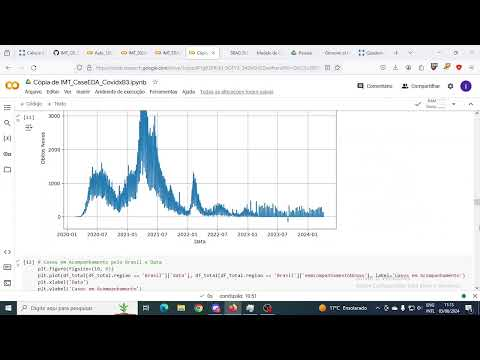

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('iTjwyird-Nc')

---

In [ ]:
#@markdown
#@title **Avaliação**
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}





In [ ]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.4



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.4
1,1115677,DANIEL HENRIQUE,7.4
